<a href="https://colab.research.google.com/github/vrmusketeers/DeepLearningProject/blob/main/notebooks/Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libs

In [ ]:
!pip install dalle-pytorch --upgrade

Requirement already up-to-date: dalle-pytorch in /usr/local/lib/python3.7/dist-packages (0.11.1)
     |████████████████████████████████| 133kB 9.1MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.26.4
    Uninstalling urllib3-1.26.4:
      Successfully uninstalled urllib3-1.26.4


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dalle_pytorch import OpenAIDiscreteVAE, VQGanVAE1024, DiscreteVAE, DALLE
from dalle_pytorch.tokenizer import tokenizer
from torchvision.utils import make_grid
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Inference

In [ ]:
input_text = 'the first floor has one kitchen one living room two bathrooms three bedrooms.'

In [ ]:
loaded_obj = torch.load(str('/content/drive/MyDrive/CMPE 258 Deep Learning/DALL-E/model/cubicasa/dalle/2021-04-23.pt'), map_location='cpu')
dalle_params, vae_params, weights = loaded_obj['hparams'], loaded_obj['vae_params'], loaded_obj['weights']
vae = DiscreteVAE(**vae_params)
dalle = DALLE(vae=vae, **dalle_params)
dalle.load_state_dict(weights)

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the first floor has one kitchen one living room two bathrooms three bedrooms.


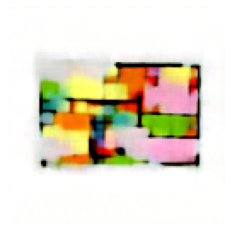

In [ ]:
descriptions = list(filter(lambda t: len(t) > 0, input_text))
text_token = tokenizer.tokenize(descriptions, 256).squeeze(0)
image = dalle.generate_images(text_token[:1], filter_thres = 0.9)

arr_ = np.squeeze(image[0].permute(1,2,0).cpu())
print(input_text)
plt.imshow(arr_)
plt.axis('off')
plt.show()